In [1]:
# 这是一个简单的规则
# 判断uvxy 和 spy 是否同方向了，并作出操作

In [2]:
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels
from statsmodels.tsa.stattools import coint
import pandas as pd
import scipy.stats as st
from statsmodels.stats.stattools import jarque_bera
import os


In [3]:
reload = False

cycle = '2y'
file_name = 'uvxy_' + cycle

if not reload and  os.path.exists(file_name):
    hist = pd.read_csv(file_name)
else:
    tmp = yf.Ticker("UVXY")
    hist = tmp.history(period=cycle)
    hist.to_csv(file_name)
    

file_name = 'spy_' + cycle
if not reload and  os.path.exists(file_name):
    spy_hist = pd.read_csv(file_name)
else:
    tmp = yf.Ticker("SPY")
    spy_hist = tmp.history(period=cycle)
    spy_hist.to_csv(file_name)

print(hist.shape)
print(spy_hist.shape)

(504, 8)
(504, 8)


In [4]:
hist.shape

(504, 8)

In [5]:
hist['gains'] = (hist.Close - hist.Close.shift(1))/hist.Close.shift(1) * 100
spy_hist['gains'] = (spy_hist.Close - spy_hist.Close.shift(1))/spy_hist.Close.shift(1) * 100

hist.dropna(inplace=True)
spy_hist.dropna(inplace=True)

In [6]:
hist.head(100)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,gains
1,2019-04-11,35.759998,36.139999,35.259998,35.400002,6898600,0,0,-3.119867
2,2019-04-12,34.270000,34.400002,32.830002,32.970001,9047500,0,0,-6.864407
3,2019-04-15,32.200001,34.299999,32.150002,32.330002,8012200,0,0,-1.941157
4,2019-04-16,32.049999,32.330002,31.450001,31.980000,6795700,0,0,-1.082593
5,2019-04-17,31.139999,33.160000,31.120001,32.270000,8714900,0,0,0.906820
...,...,...,...,...,...,...,...,...,...
96,2019-08-27,33.060001,36.250000,32.919998,34.869999,15273600,0,0,2.558820
97,2019-08-28,36.060001,36.930000,33.700001,33.759998,12259300,0,0,-3.183254
98,2019-08-29,32.230000,32.700001,31.129999,31.670000,11648200,0,0,-6.190753
99,2019-08-30,30.700001,32.990002,30.680000,31.750000,12755100,0,0,0.252605


<AxesSubplot:>

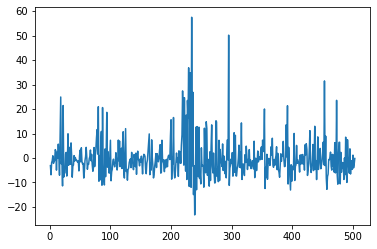

In [7]:
hist.gains.plot()

In [8]:
print(hist['gains'].describe())
spy_hist['gains'].describe()

count    503.000000
mean      -0.106007
std        8.058518
min      -23.246625
25%       -4.632810
50%       -1.379721
75%        2.239584
max       57.477283
Name: gains, dtype: float64


count    503.000000
mean       0.090868
std        1.601597
min      -10.942361
25%       -0.413455
50%        0.156939
75%        0.752375
max        9.060331
Name: gains, dtype: float64

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='gains', ylabel='Density'>

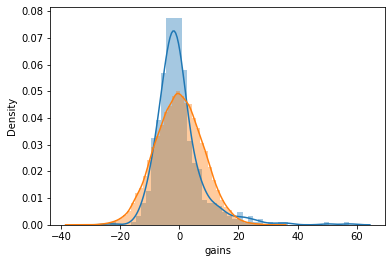

In [9]:
sns.distplot(hist.gains)
np.random.seed(987654321)
x = np.random.normal(-0.092625, 8.077169, 30000)
sns.distplot(x)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='gains', ylabel='Density'>

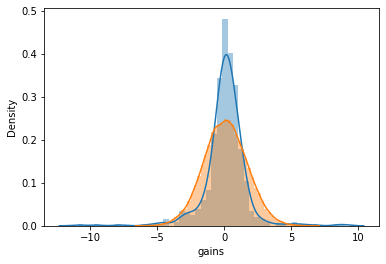

In [10]:
sns.distplot(spy_hist.gains)
x = np.random.normal(0.088377, 1.604703, 30000)
sns.distplot(x)

In [11]:
np.random.seed(987654321)
x = np.random.normal(5, 10, 300000)
print(x[0:5])

def statistical(data):
    print("偏度：", st.skew(data))
    print("峰值：", st.kurtosis(data)+3)
    #print(jarque_bera(hist.gains))
    print(st.jarque_bera(data))
    print('---------------------')
    
statistical(x)
statistical(hist.gains)
statistical(spy_hist.gains)

[27.4655081  -1.45918225 -6.83576993 24.29492519  5.66813988]
偏度： 0.001969106184678132
峰值： 2.9954712147841973
Jarque_beraResult(statistic=0.4502426524627958, pvalue=0.7984193436727083)
---------------------
偏度： 2.271849608629579
峰值： 12.978516152294466
Jarque_beraResult(statistic=2519.5267312832148, pvalue=0.0)
---------------------
偏度： -0.7387147290766501
峰值： 15.3346570488799
Jarque_beraResult(statistic=3234.427535233452, pvalue=0.0)
---------------------


In [12]:
st.ks_2samp(hist[-100:-10].gains, hist[-10:].gains)
# st.ks_2samp(spy_hist[0:-100].gains, spy_hist[-100:].gains)

KstestResult(statistic=0.2222222222222222, pvalue=0.7071172787085076)

In [13]:
---

SyntaxError: invalid syntax (<ipython-input-13-29e0c3615294>, line 1)

In [ ]:
st.norm.cdf(-5, hist['gains'].mean(), hist['gains'].std())

In [ ]:
spy = yf.Ticker("SPY")
spy_hist = spy.history(period="300d")


In [ ]:
spy_hist['gains'].describe()

In [ ]:
sns.distplot(spy_hist.gains)

In [ ]:
st.norm.cdf(-1, spy_hist['gains'].mean(), spy_hist['gains'].std())

In [ ]:
spy_hist.Close.plot(figsize=(10,10))
hist.Close.plot()

In [ ]:
np.corrcoef(spy_hist.Close, hist.Close)

In [ ]:
spy_hist.gains.fillna(0, inplace=True)
hist.gains.fillna(0, inplace=True)

In [ ]:
hist.gains.cumsum().plot()
spy_hist.gains.cumsum().plot()

In [ ]:
# 差分
hist['close_diff']  = hist.Close - hist.Close.shift(1) + 1
spy_hist['close_diff']  = spy_hist.Close - spy_hist.Close.shift(1) + 1

hist.dropna(inplace=True)
spy_hist.dropna(inplace=True)

hist.head()

In [ ]:
spy_hist.head()

In [ ]:
score, pvalue, _ = coint(hist.gains, spy_hist.gains)
print(score, pvalue)

score, pvalue, _ = coint(hist.Close, spy_hist.Close)
print(score, pvalue)

score, pvalue, _ = coint(hist.close_diff, spy_hist.close_diff)
print(score, pvalue)

In [ ]:
print(np.corrcoef(hist.Close, spy_hist.Close))
print(np.corrcoef(hist.close_diff, spy_hist.close_diff))
print(np.corrcoef(spy_hist.gains, hist.gains))

In [ ]:
hist.reset_index(inplace=True)
spy_hist.reset_index(inplace=True)

In [ ]:
col = ['Date','gains','Close','close_diff']
data = pd.merge(hist[col], spy_hist[col],suffixes=['_uvxy','_spy'], on='Date')
data.set_index(keys='Date')

In [ ]:
# data['rate'] = (data.gains_uvxy+0.1) / (data.gains_spy+0.1)
data['rate'] = data.gains_uvxy - data.gains_spy
# data['rate'] = data.close_diff_uvxy - data.close_diff_spy

data[data['rate']>0]

In [ ]:
data.rate.describe()

In [ ]:
sns.distplot(data.rate)

In [ ]:
data.fillna(0,inplace=True)
data.isna().sum()

In [ ]:
print((data.rate>50).sum())
# data = data[abs(data['rate'])<50]
(data.rate>50).sum()

data.rate.plot()
plt.axhline(data.rate.mean(), color='red', linestyle='--') 

In [ ]:
def zscore(series):
    print(series.mean(), series.std())
    return (series - series.mean()) / np.std(series)

z_score = zscore(data.rate)
z_score.plot(figsize=(10,10))
plt.axhline(z_score.mean())
plt.axhline(1.0, color='red')
plt.axhline(-1.0, color='green')
plt.show()

# 开始预测

In [ ]:
print(z_score.shape)
train = z_score[:200]
test = z_score[200:]
print(train.shape, test.shape)

plt.figure(figsize=(15,7))
train.plot()

buy = train.copy()
sell = train.copy()

# buy[train>-1] = 0
# sell[train<1] = 0
buy[~((data['gains_uvxy']>-1) & (data['gains_spy']>0))] = 0
sell[~((data['gains_uvxy']<1) & (data['gains_spy']<0))] = 0



buy.plot(color='g', linestyle='None', marker='^')
sell.plot(color='r', linestyle='None', marker='^')
x1,x2,y1,y2 = plt.axis()
# plt.axis((x1,x2,data.rate.min(),data.rate.max()))
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.show()

In [ ]:
# Plot the prices and buy and sell signals from z score
plt.figure(figsize=(10,10))
S1 = hist.iloc[:200].Close
S2 = spy_hist.iloc[:200].Close

S1.plot(color='b')
S2.plot(color='c')

buyR = 0*S1.copy()
sellR = 0*S1.copy()

# When buying the ratio, buy S1 and sell S2
buyR[buy!=0] = S1[buy!=0]
sellR[buy!=0] = S2[buy!=0]
# When selling the ratio, sell S1 and buy S2 
buyR[sell!=0] = S2[sell!=0]
sellR[sell!=0] = S1[sell!=0]

buyR.plot(color='g', linestyle='None', marker='^')
# sellR.plot(color='r', linestyle='None', marker='^')

x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,min(S1.min(),S2.min()),max(S1.max(),S2.max())))
plt.legend(['UVXY','SPY', 'Buy Signal', 'Sell Signal'])
plt.show()

In [ ]:
# Trade using a simple strategy
def trade(data, window1, window2):
    
    S1 = data['gains_uvxy']
    S2 = data['gains_spy']
    
    close = data['Close_uvxy']
    date = data['Date']
    # If window length is 0, algorithm doesn't make sense, so exit
    if (window1 == 0) or (window2 == 0):
        return 0
    
    # Compute rolling mean and rolling standard deviation
    
    # Simulate trading
    # Start with no money and no positions
    money = 0
    countS1 = 0
    countS2 = 0
    for i in range(len(S1)):
        # buy
        if S1[i]>1 and S2[i]>0:
          
            if countS1<0:
                money -= close[i]*abs(countS1)
                countS1 = 0
            
            money -= close[i]
            countS1 += 1
                
            print('Buying volatility %s at %f %f %s %s'%(date[i], close[i], money+countS1*close[i], countS1,countS2))
        elif S1[i]<0 and S2[i]<0:
            if countS1>0:
                money += close[i] * countS1
                countS1 = 0
            
            money += close[i]
            countS1 -= 1
                
            print('Selling volatility %s at %f %f %s %s'%(date[i], close[i], money+countS1*close[i], countS1,countS2))
            
   
            
    return money+countS1*close.iloc[-1]
trade(data.iloc[:200], 5, 60)

In [ ]:
data[hist['Date'] == "2020-03-25"]

In [ ]:
data[spy_hist['Date'] == "2020-03-24"]

In [ ]:
data[spy_hist['Date'] == "2020-03-26"]